

Outlines
===================
- Dataset
- Transforms
- Dataloader




Until now, we have dealt with image sets that could fit in memory, and we
manipulated them as regular tensors, e.g.

In [ ]:
train_set = torchvision.datasets.MNIST('./data/mnist/', train = True, download = True)
train_input = train_set.data.view(-1, 1, 28, 28).float()
train_targets = train_set.targets

    
However, large sets do not fit in memory, and samples have to be constantly
loaded during training.
This require to parallelize the loading itself, but also
the normalization, and data-augmentation operations.


PyTorch provides two data primitives: ``torch.utils.data.DataLoader`` and ``torch.utils.data.Dataset``
that allow you to use pre-loaded datasets as well as your own data.
``Dataset`` stores the samples and their corresponding labels, and ``DataLoader`` wraps an iterable around
the ``Dataset`` to enable easy access to the samples.

PyTorch domain libraries provide a number of pre-loaded datasets (such as FashionMNIST) that 
subclass ``torch.utils.data.Dataset`` and implement functions specific to the particular data.
They can be used to prototype and benchmark your model.




Loading a Dataset
-------------------

Fashion-MNIST is a dataset of Zalando’s article images consisting of of 60,000 training examples and 10,000 test examples.
Each example comprises a 28×28 grayscale image and an associated label from one of 10 classes: **['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']**


<img src='https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png' />


You can find all the available datasets on torchvision in this [link](https://pytorch.org/vision/stable/datasets.html)

In [1]:
from torchvision import datasets
#datasets.

Here is an example of how to load the `Fashion-MNIST` dataset from TorchVision:

We will load the `FashionMNIST` Dataset with the following parameters:
 - ``root`` is the path where the train/test data is stored,
 - ``train`` specifies training or test dataset,
 - ``download=True`` downloads the data from the internet if it's not available at ``root``.
 - ``transform`` and ``target_transform`` specify the feature and label transformations

### Transforms
- In many cases we need to apply transformations to our training set e.g normalizations.
- transforms.Compose([]) allows composing series of transforms from these custom transforms.
- torchvision package provides some common transforms as well
such as **transforms.Normalize((mean), (std))**, and **transforms.ToTensor()**.

We can import it by **import torchvision.transforms as transforms**

In [39]:
import torchvision.transforms as transforms

my_transforms = transforms.Compose([
     transforms.CenterCrop(100),
     transforms.ToTensor(), ])

In [3]:
import torch
from torchvision import datasets
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=my_transforms
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=my_transforms,
)


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw
Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:479: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: Compose(
               CenterCrop(size=(100, 100))
               ToTensor()
           )

In [5]:
len(training_data)

60000

Iterating and Visualizing the Dataset
-----------------

We can index ``Datasets`` manually like a list: ``training_data[index]``. 
We use ``matplotlib`` to visualize some samples in our training data.



In [ ]:
#training_data[0]

In [ ]:
#training_data[0][0] 

In [6]:
training_data[0][1]

9

torch.Size([1, 100, 100])
torch.Size([1, 100, 100])
torch.Size([1, 100, 100])
torch.Size([1, 100, 100])
torch.Size([1, 100, 100])
torch.Size([1, 100, 100])
torch.Size([1, 100, 100])
torch.Size([1, 100, 100])
torch.Size([1, 100, 100])


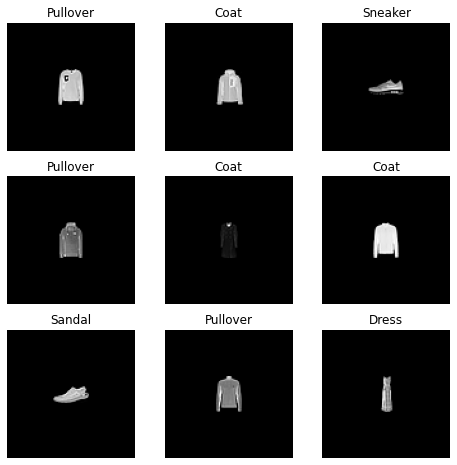

In [7]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    print(img.shape)
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

--------------




Creating a Custom Dataset for your files
---------------------------------------------------
### torch.utils.data.Dataset
Abstract class representing a dataset. Your custom dataset should inherit Dataset and override the following methods:
- `__len__` so that len(dataset) returns the size of the dataset.
- `__getitem__` to support the indexing such that dataset[i] can be used to get ii\ th sample and the `__init__` funtcion.

Take a look at this implementation; the FashionMNIST images are stored 
in a directory ``img_dir``, and their labels are stored separately in a CSV file ``annotations_file``. 

In the next sections, we'll break down what's happening in each of these functions.



In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [35]:
import pandas as pd
from torchvision.io import read_image
from torch.utils.data import Dataset


In [108]:
img_dir = '/content/drive/MyDrive/data/Img_dir'
annotations_file_path = '/content/drive/MyDrive/data (1)/labels1.csv'

annotations = pd.read_csv(annotations_file_path)
annotations.head()

,Image_name,label
0,w_00001090.JPG,0
1,w_w_06 (2).jpg,0
2,w_w_00000659.jpg,0
3,w_w_00001081.jpg,0
4,w_00000276.JPG,0


In [109]:
annotations[annotations['Image_name'] == 'w_w_00001081.jpg']

,Image_name,label
3,w_w_00001081.jpg,0


### Delete the images **.gif** in the data annotations

In [110]:
for i in annotations['Image_name']:
    if '.gif' in i:
      print(annotations[annotations['Image_name'] == i]) 

In [111]:
# drop the rows index 79, 633, 637

#annotations = annotations.drop([79, 633, 637])

In [112]:
# check
for i in annotations['Image_name']:
    if '.gif' in i:
      print(annotations[annotations['Image_name'] == i]) 

In [113]:
import os
import pandas as pd
from torchvision.io import read_image
from torch.utils.data import Dataset

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        sample = (image, label)
        return sample

__init__


The __init__ function is run once when instantiating the Dataset object. We initialize
the directory containing the images, the annotations file, and both transforms.


In [114]:
def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

__len__

The __len__ function returns the number of samples in our dataset.

Example:



In [115]:
def __len__(self):
    return len(self.img_labels)

__getitem__

The __getitem__ function loads and returns a sample from the dataset at the given index ``idx``. 
Based on the index, it identifies the image's location on disk, converts that to a tensor using ``read_image``, retrieves the 
corresponding label from the csv data in ``self.img_labels``, calls the transform functions on them (if applicable), and returns the 
tensor image and corresponding label in a tuple.



In [116]:
def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    sample = (image, label)
    return sample

Usually we load the data in `__init__` but leave the reading of the images to `___getitem___`.
This is memory efficient because all the images are not stored in the memory at once but read as
required.

In `__getitem___` you choose the way you want to form your training sample, i.e it can be of any convenient
shape or data structure
- Our dataset will take an optional argument transform so that any required processing can be applied on the
sample.


--------------




In [117]:
## Using our custom dataset
custom_dataset = CustomImageDataset(annotations_file_path, img_dir)
custom_dataset[2][0].shape

torch.Size([3, 452, 361])

In [118]:
custom_dataset[20][0].shape

torch.Size([3, 449, 800])

Preparing your data for training with DataLoaders
-------------------------------------------------

##torch.utils.data.DataLoader

- Combines a dataset and a sampler, and provides an iterable over the given dataset, supports:
- Batching the data
- Shuffling the data
- Load the data in parallel using multiprocessing workers.
PyTorch provides an easy switch to perform multi-process data loading by simply setting the
argument num_workers to a positive integer.
Having more workers will increase the memory and the loading process will be faster.
- dataloader = DataLoader(transformed_dataset, batch_size=4, shuffle=True, num_workers=4)


``DataLoader`` is an iterable that abstracts this complexity for us in an easy API.



In [97]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)

In [98]:
train_dataloader_ = DataLoader(custom_dataset, batch_size=32, shuffle=True, num_workers=2)
train_dataloader_

## Solution

In [40]:
my_transforms = transforms.Resize()
Resizcustom_dResizResizcustom_dResizResizcustom_dResizResizcustom_dResizResizcustom_dResizResizcustom_dResizResizcustom_dResizResizcustom_datasetcustom_dataseteResizcustom_datasetcustom_datasetecustom_datasetcustom_dataseteatasetcustom_dataseteResizcustom_datasetcustom_datasetecustom_datasetcustom_dataseteatasetcustom_dataseteResizcustom_datasetcustom_datasetecustom_datasetcustom_dataseteatasetcustom_dataseteResizcustom_datasetcustom_datasetecustom_datasetcustom_dataseteatasetcustom_dataseteResizcustom_datasetcustom_datasetecustom_datasetcustom_dataseteatasetcustom_dataseteResizcustom_datasetcustom_datasetecustom_datasetcustom_dataseteatasetcustom_dataseteResizcustom_datasetcustom_datasetecustom_datasetcustom_dataseteatasetcustom_dataseteResizcustom_datasetcustom_datasetecustom_datasetcustom_datasete((520, 520))
## Using our custom dataset
custom_dataset = CustomImageDataset(annotations_file_path, img_dir, transform=my_transforms)
custom_dataset[20][0].shape

TypeError: ignored

In [119]:
my_transforms = transforms.Resize((150, 150))

custom_dataset = CustomImageDataset(annotations_file_path, img_dir, transform=my_transforms)
custom_dataset[20][0].shape

torch.Size([3, 150, 150])

In [120]:
train_dataloader_ = DataLoader(custom_dataset, batch_size=4, shuffle=True)

In [121]:
for i, batch in enumerate(train_dataloader_):
    image, label = batch
    print(image.shape, label)

    if i==3:
        break

torch.Size([4, 3, 150, 150]) tensor([0, 0, 0, 0])
torch.Size([4, 3, 150, 150]) tensor([1, 0, 0, 1])
torch.Size([4, 3, 150, 150]) tensor([1, 0, 1, 0])
torch.Size([4, 3, 150, 150]) tensor([0, 0, 1, 1])


- Dataloader needs the dataset to iterate on it.

- Transform help to do any transformations in our dataset.

- Samplers: tells the dataloader in which order it will trait the dataset.

- DataLoader supports automatically collating individual fetched data samples into batches via arguments batch_size.

Iterate through the DataLoader
--------------------------

We have loaded that dataset into the ``Dataloader`` and can iterate through the dataset as needed.
Each iteration below returns a batch of ``train_features`` and ``train_labels``(containing ``batch_size=64`` features and labels respectively).
Because we specified ``shuffle=True``, after we iterate over all batches the data is shuffled (for finer-grained control over 
the data loading order, take a look at [Samplers](https://pytorch.org/docs/stable/data.html#data-loading-order-and-sampler_).



Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


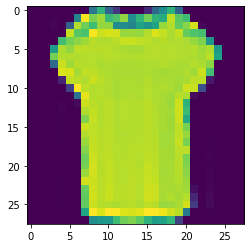

Label: 6
Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


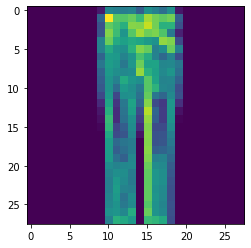

Label: 1


In [102]:
# Display image and label.

for i, batch in enumerate(train_dataloader):
    train_features, train_labels = batch
    print(f"Feature batch shape: {train_features.size()}")
    print(f"Labels batch shape: {train_labels.size()}")
    img = train_features[0]
    label = train_labels[0]
    plt.imshow(img.squeeze())
    plt.show()
    print(f"Label: {label}")
    if i == 1:
        break

Feature batch shape: torch.Size([4, 3, 150, 150])
Labels batch shape: torch.Size([4])


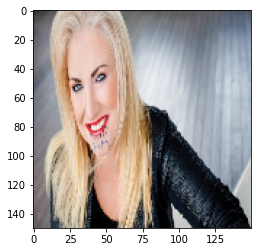

Label: 0
Feature batch shape: torch.Size([4, 3, 150, 150])
Labels batch shape: torch.Size([4])


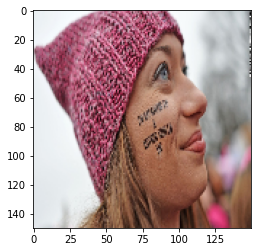

Label: 0


In [47]:
# Display image and label.

for i, batch in enumerate(train_dataloader_):
    train_features, train_labels = batch
    print(f"Feature batch shape: {train_features.size()}")
    print(f"Labels batch shape: {train_labels.size()}")
    img = train_features[0]
    label = train_labels[0]
    plt.imshow(img.permute(1,2, 0))
    plt.show()
    print(f"Label: {label}")
    if i == 1:
        break

**Given this train_loader, we can now re-write our training procedure with a
loop over the mini-batches**

In [122]:
import torch
import torch.nn as nn
from torch import optim

In [123]:
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

In [124]:
train_features, _ = next(iter(train_dataloader_))

--------------




In [125]:

D = train_features.shape[1] * train_features.shape[2] * train_features.shape[3]
print(D)
model = nn.Sequential(
    nn.Linear(D, 64),
    nn.ReLU(),
    nn.Linear(64, 2)
)
model = model.to(device = device)
model

67500


Sequential(
  (0): Linear(in_features=67500, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=2, bias=True)
)

In [126]:
optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

In [129]:
epochs = 5
epoch_losses = []

for epoch in range(epochs):
    epoch_loss = 0
    for batch in train_dataloader_:
        input_features, targets = batch
        input_features, targets = input_features.to(device), targets.to(device)
        #forward
        input_features = input_features.view(-1,input_features.shape[1]*input_features.shape[2]*input_features.shape[3]).float()
        #print(type(input_features))

        y_pred = model(input_features)
        #compute the loss
        #print(y_pred.shape, targets.shape)
        loss = criterion(y_pred, targets)

        epoch_loss += loss.item()
        
        #compute the gradient
        loss.backward()

        #use the gradient to update the weights
        optimizer.step()

        #set the gard to zero so that it doesn't accumlate (just in pytorch)
        optimizer.zero_grad()

    print('epoch ==> ', epoch, 'epoch loss ==> ', loss.item())
    epoch_losses.append(epoch_loss)

epoch ==>  0 epoch loss ==>  1.1511173248291016
epoch ==>  1 epoch loss ==>  0.7656823396682739
epoch ==>  2 epoch loss ==>  0.37813228368759155
epoch ==>  3 epoch loss ==>  0.3719037175178528
epoch ==>  4 epoch loss ==>  0.3734174370765686


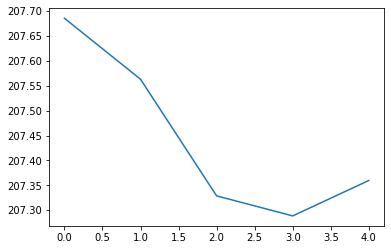

In [130]:
plt.plot(epoch_losses)